## From Basics to Healthcare: Logistic Regression with Loan Approval and Diabetes Prediction.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [107]:
# Sample dataset: Loan approval based on income, age, and credit score
data = {
    'Age': [25, 45, 35, 52, 23, 40, 60, 48, 33, 28],
    'Income': [30000, 80000, 50000, 120000, 25000, 60000, 95000, 70000, 45000, 38000],
    'CreditScore': [650, 720, 680, 750, 610, 690, 740, 710, 670, 660],
    'LoanApproved': [0, 1, 1, 1, 0, 1, 1, 1, 1, 0]  # 1 = Approved, 0 = Not Approved
}
Loan_df = pd.DataFrame(data)
Loan_df.head()

,Age,Income,CreditScore,LoanApproved
0,25,30000,650,0
1,45,80000,720,1
2,35,50000,680,1
3,52,120000,750,1
4,23,25000,610,0


In [108]:
print(Loan_df.describe(), "\n")
print(Loan_df['LoanApproved'].value_counts())

             Age         Income  CreditScore  LoanApproved
count  10.000000      10.000000    10.000000     10.000000
mean   38.900000   61300.000000   688.000000      0.700000
std    12.260596   30262.004046    43.153473      0.483046
min    23.000000   25000.000000   610.000000      0.000000
25%    29.250000   39750.000000   662.500000      0.250000
50%    37.500000   55000.000000   685.000000      1.000000
75%    47.250000   77500.000000   717.500000      1.000000
max    60.000000  120000.000000   750.000000      1.000000 

LoanApproved
1    7
0    3
Name: count, dtype: int64


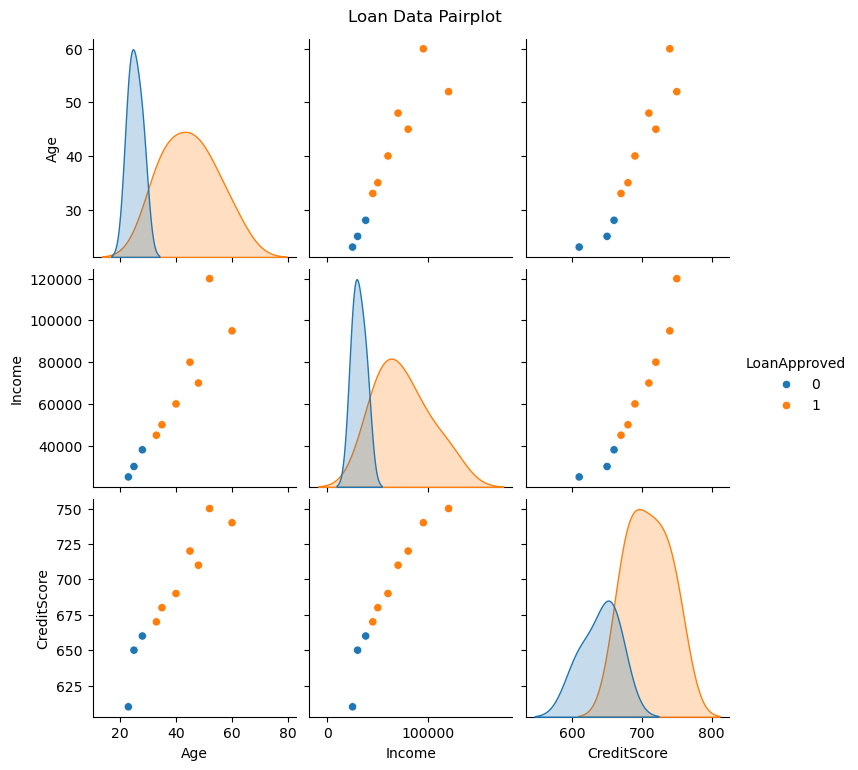

In [109]:
sns.pairplot(Loan_df, hue='LoanApproved')
plt.suptitle("Loan Data Pairplot", y=1.02)
plt.show()

In [110]:
# Features and target
X = Loan_df[['Age', 'Income', 'CreditScore']]
y = Loan_df['LoanApproved']

# Split into training and testing (50/50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [111]:
print(y.value_counts())
print(y_test.value_counts())

LoanApproved
1    7
0    3
Name: count, dtype: int64
LoanApproved
1    3
0    1
Name: count, dtype: int64


In [112]:
# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train);

In [113]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Accuracy Score: 1.0


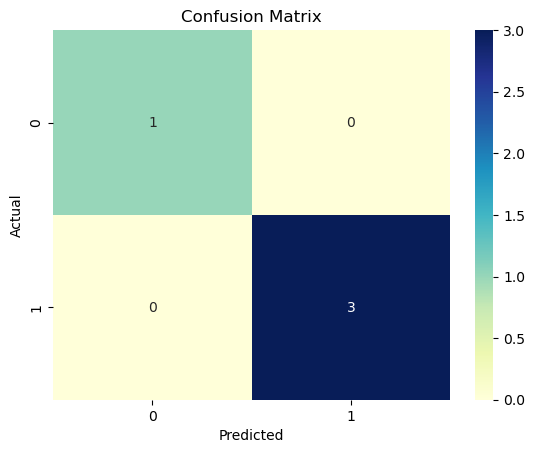

In [114]:
# Confussion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

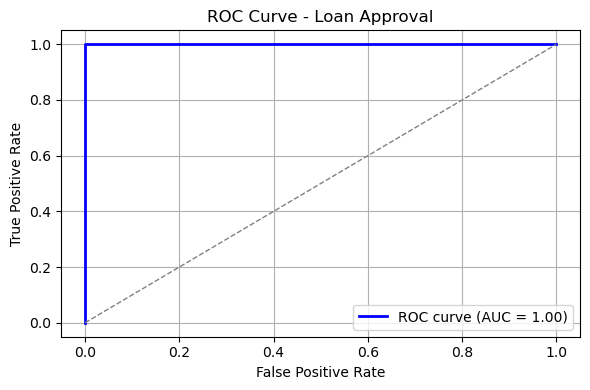

In [115]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Loan Approval')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
# Simple Loan Approval Predictor

def simple_loan_prediction():
    print("=== LOAN APPROVAL PREDICTOR ===")
    
    while True:
        # Get user inputs
        try:
            age = int(input("Enter your age: "))
            income = float(input("Enter your annual income ($): "))
            credit_score = int(input("Enter your credit score: "))
        except ValueError:
            print("Please enter valid number.\n")
            continue
        
        # Make prediction
        user_data = pd.DataFrame([[age, income, credit_score]],
                                 columns=['Age', 'Income', 'CreditScore'])
        prediction = model.predict(user_data)[0]
        probability = model.predict_proba(user_data)[0][1]
        
        # Show result
        print(f"\nYour Info: Age={age}, Income=${income:,}, Credit Score={credit_score}")
        if prediction == 1:
            print(f"✅ APPROVED! (Confidence: {probability:.1%})")
        else:
            print(f"❌ NOT APPROVED (Chance: {probability:.1%})")

        # Ask to continue
        again = input("\nTry again? (y/n): ").strip().lower()
        if again != 'y':
            print("Goodbye!")
            break

# Run the simple predictor
simple_loan_prediction()

=== LOAN APPROVAL PREDICTOR ===


Enter your age:  35
Enter your annual income ($):  89000
Enter your credit score:  720



Your Info: Age=35, Income=$89,000.0, Credit Score=720
✅ APPROVED! (Confidence: 100.0%)



Try again? (y/n):  n


Goodbye!


In [72]:
# Summary Insight:
# The model predicts loan approval using Age, Income, and Credit Score.
# The Confusion Matrix shows perfect predictions: 1 true negative and 3 true positives.
# Accuracy Score = 1.0 shows the model predicted all test samples correctly.
# Precision, Recall, and F1-score are all 1.00, showing very strong performance (on small data).
# A simple user input is taken, and a prediction is made.

In [117]:
# Project (Diabetes Detection)
# import necessary Libraries

# Load dataset (adjust path if needed)
df = pd.read_csv("diabetes.csv")

In [118]:
# Show first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
# Explore the dataset

# Check dataset shape
print("\nData Shape:", Loan_df.shape)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Summary statistics
print("\nData Description:")
print(Loan_df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Data Shape: (10, 4)

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Data Description:
             Age         Income  CreditScore  LoanApproved
count  10.000000      10.000000    10.000000     10.000000
mean   38.900000   61300.000000   688.000000      0.700000
std    12.260596   30262.004046    43.153473      0.483046
min    23.000000   25000.000000   610.000000      0.000000
25%    29.250000   39750.000000   662.500000      0.250000
50%    37.500000   55000.000000   685.000000      1.000000
75%    47.250000   77500.000000   717.500000      1.000000
max    60.000000  120000.000000   750.000000      1.000000

Missing Values:
Pregnancies                 0
Glucose                     0
B

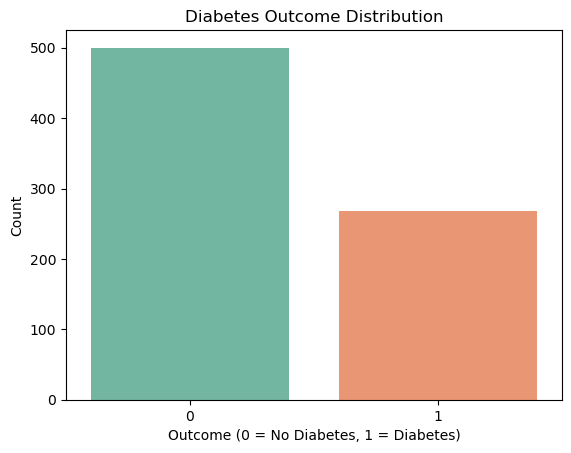

In [120]:
# Simple Exploratory Data Analysis (EDA)

# Count of diabetic vs non-diabetic
sns.countplot(x='Outcome', data=df, hue='Outcome', palette='Set2', legend=False)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

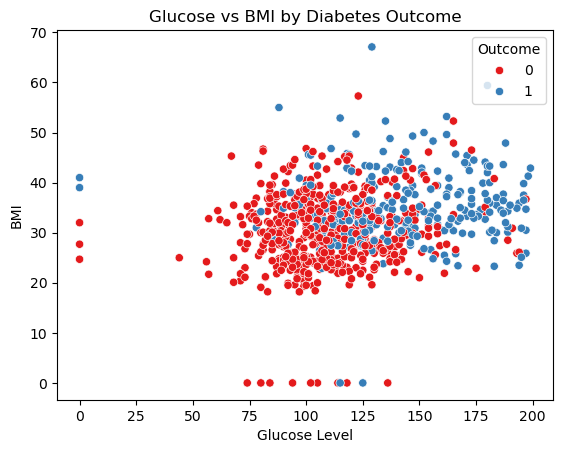

In [121]:
# Glucose vs BMI scatter plot
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='Set1')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Outcome', loc='upper right')
plt.show()

In [122]:
# Preprocessing and Splitting the Data

# Separate features and target
X = df.drop("Outcome", axis=1) # Features: all columns except the target
y = df["Outcome"] # Target: the 'Outcome' column

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [123]:
print(y.value_counts())
print(y_test.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    150
1     81
Name: count, dtype: int64


In [124]:
# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train);

In [125]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nAUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[129  21]
 [ 39  42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231


Accuracy Score: 0.7402597402597403

AUC Score: 0.8375308641975308


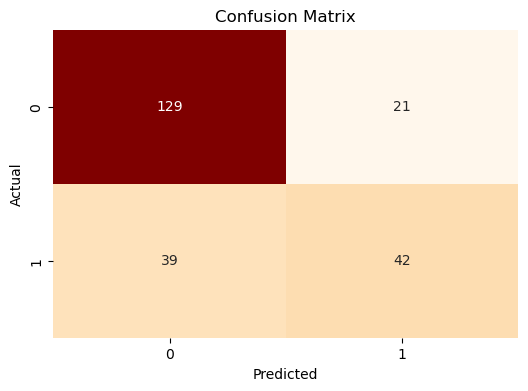

In [126]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

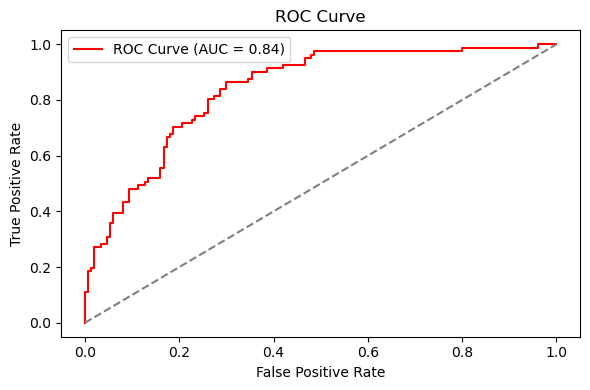

In [127]:
# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
def diabetes_predictor():
    while True:  # Main loop
        print("=== DIABETES RISK PREDICTOR ===")
        
        # Get user input
        try:
            Pregnancies = int(input("Number of pregnancies: "))
            Glucose = int(input("Glucose level: "))
            BloodPressure = int(input("Blood pressure: "))
            SkinThickness = int(input("Skin thickness: "))
            Insulin = int(input("Insulin level: "))
            BMI = float(input("BMI: "))
            DPF = float(input("Diabetes Pedigree Function: "))
            Age = int(input("Age: "))
        except ValueError:
            print("Invalid input. Please enter numeric values.")
            continue
        
        # Prepare input
        user_data = pd.DataFrame([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age]],
                                  columns=X.columns)
        
        # Make Prediction
        prediction = model.predict(user_data)[0]
        probability = model.predict_proba(user_data)[0][1]
        
        # Display result
        print("\n=== Result ===")
        if prediction == 1:
            print(f"⚠️ High risk of diabetes (Confidence: {probability:.1%})")
        else:
            print(f"✅ Low risk of diabetes (Confidence: {1 - probability:.1%})")
        
        # Ask to continue
        again = input("\nTry again? (y/n): ").strip().lower()
        if again != 'y':
            print("Goodbye!")
            break  # Exit the while loop
        
        # print()  # Add blank line for next iteration

# Run the predictor
diabetes_predictor()

=== DIABETES RISK PREDICTOR ===


Number of pregnancies:  0
Glucose level:  101
Blood pressure:  65
Skin thickness:  29
Insulin level:  0
BMI:  24.6
Diabetes Pedigree Function:  0.237
Age:  22



=== Result ===
✅ Low risk of diabetes (Confidence: 95.3%)



Try again? (y/n):  n


Goodbye!


In [ ]:
# Summary Insight:
# The model predicts whether a patient has diabetes based on health metrics like glucose, BMI, age, etc.
# Accuracy Score: ~74% suggests the model makes good predictions, but can be improved.
# AUC Score: ~0.84 proves strong at separating positive (diabetic) and negative (non-diabetic) cases.
# Confusion Matrix shows the model correctly identifies most non-diabetic and diabetic cases.
# A ROC curve helps us understand the model’s ability to distinguish classes.
# A manual prediction input system was also added for user interaction.